In [1]:
import os

import copy as cp
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import getdist as gd
import getdist.plots as gdp

%matplotlib inline

from lyaemu import likelihood as lyl
from lyaemu import lyman_data as lyd


/share/apps/anaconda/python3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/keir/Software/lya_emulator/lyaemu/SimulationRunner/SimulationRunner/cambpower.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/share/apps/anaconda/python3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/share/apps/anaconda/python3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/share/apps/an

In [2]:
basedir = '/share/data2/keir/Simulations/nCDM_emulator_512'
emulator_json = 'emulator_params_TDR_u0_original.json'
use_measured_params = True
redshift_dependent_params = True

lyman_data_instance = lyd.BoeraData()
z = lyman_data_instance.redshifts_unique[::-1]


likelihood_instance = lyl.UltraLightAxionLikelihoodClass(basedir, mean_flux='free_high_z', max_z=np.max(z),
                                                         redshifts=z, pixel_resolution_km_s=1., emulator_class='nCDM',
                                                         emulator_json_file=emulator_json,
                                                         use_measured_parameters=use_measured_params,
                                                         redshift_dependent_parameters=redshift_dependent_params,
                                                         data_class='Boera',
                                                         dark_matter_model=lyl.ultra_light_axion_numerical_model)

likelihood_instance.data_fluxpower = likelihood_instance.lyman_data_flux_power[::-1].flatten()


Beginning to generate emulator at 2020-03-29 16:32:11.703855
k_max_emulated_h_Mpc = 28.093018599498517 0.19952623149688797 4.95 0.33
dpvals = [[0.73805814]
 [0.79181238]
 [0.84556662]
 [0.89932086]
 [0.95307511]
 [1.00682935]
 [1.06058359]
 [1.11433784]
 [1.16809208]
 [1.22184632]]
nuggets = [0.         0.00096758 0.00193515 0.00290273 0.00387031 0.00483788
 0.00580546 0.00677303 0.00774061 0.00870819 0.00967576 0.01064334
 0.01161092 0.01257849 0.01354607 0.01451365 0.01548122 0.0164488
 0.01741637 0.01838395 0.01935153 0.0203191  0.02128668 0.02225426
 0.02322183 0.02418941 0.02515699 0.02612456 0.02709214 0.02805971
 0.02902729 0.02999487 0.03096244 0.03193002 0.0328976  0.03386517
 0.03483275 0.03580033 0.0367679  0.03773548 0.03870306 0.03967063
 0.04063821 0.04160578 0.04257336 0.04354094 0.04450851 0.04547609
 0.04644367 0.04741124]
mean_flux = [[0.27388422 0.36723956 0.45885946]
 [0.24923206 0.34140027 0.43354996]
 [0.22679882 0.31737906 0.40963647]
 [0.20638478 0.29504799 0.38

In [3]:
#Prior function
prior_gaussian_param_names = np.array(['tau0_0', 'tau0_1', 'tau0_2', 'ns', 'As', 'omega_m', 'T_0_z_5.0', 'T_0_z_4.6',
                                      'T_0_z_4.2'])
prior_gaussian_mean = np.array([1., 1., 1., 0.9635, 1.8296e-9, 0.3209, 8022., 7651., 8673.])
prior_gaussian_std = np.array([0.05, 0.05, 0.05, 0.0057, 0.030 * 1.e-9, 0.00001, 3000., 3000., 3000.])
prior_gaussian = lambda params: likelihood_instance.log_gaussian_prior(params, prior_gaussian_param_names,
                                                                       prior_gaussian_mean, prior_gaussian_std)

prior_max_jump_param_names = np.array(['T_0', 'u_0'])
prior_max_jumps = np.array([5000., 10.])
prior_max_jump = lambda params: likelihood_instance.log_redshift_prior(params, prior_max_jump_param_names,
                                                                       prior_max_jumps)

prior_convex_hull_param_names = [['T_0_z_5.0', 'u_0_z_5.0'], ['T_0_z_4.6', 'u_0_z_4.6'], ['T_0_z_4.2', 'u_0_z_4.2']]
prior_convex_hull = lambda params: likelihood_instance.log_convex_hull_prior(params, prior_convex_hull_param_names)

prior_functions = [prior_gaussian, prior_max_jump, prior_convex_hull]


In [4]:
#Test high likelihood
test_params = np.array([0.9635, 1.8296e-9, 0.3209, 8022., 7651., 8673., 1.44, 1.48, 1.45, 4.56, 6.11, 7.24, -19.1])
test_params_mf = np.concatenate((np.array([1., 1., 1.]), test_params)) #0.77, 0.78, 0.93
test_params_mf.shape


(16,)

In [ ]:
#Test low likelihood
test_params = np.array([0.975, 1.75e-9, 0.3, 13000., 13000., 13000., 1., 1., 1., 20., 20., 20., -21.])
test_params_mf = np.concatenate((np.ones(3) * 1., test_params))
test_params_mf.shape


In [ ]:
#Test BO functions
log_posterior = likelihood_instance.log_posterior_marginalised_mean_flux(test_params, prior_functions=prior_functions)
print('log posterior marginalised =', log_posterior)


In [ ]:
#Test BO functions [low likelihood]
log_posterior = likelihood_instance.log_posterior_marginalised_mean_flux(test_params, prior_functions=prior_functions)
print('log posterior marginalised =', log_posterior)


In [ ]:
#Test log posterior
log_posterior = likelihood_instance.log_posterior(test_params_mf, prior_functions=prior_functions)
print('log posterior =', log_posterior)


In [ ]:
#Test log posterior [low likelihood]
log_posterior = likelihood_instance.log_posterior(test_params_mf, prior_functions=prior_functions)
print('log posterior =', log_posterior)


In [ ]:
#Test emulator error [marginalised]
emu_err = likelihood_instance._get_emulator_error_averaged_mean_flux(test_params)
print('emulator error marginalised =', emu_err)


In [ ]:
#Test emulator error
emu_k, emu_power, emu_std = likelihood_instance.get_predicted(test_params_mf)


In [ ]:
for i in range(len(emu_k)):
    plt.plot(np.log10(emu_k[i]), np.log10(emu_k[i] * emu_power[i] / np.pi))


In [ ]:
for i in range(len(emu_k)):
    plt.plot(np.log10(emu_k[i]), emu_std[i] / emu_power[i])
    plt.plot(np.log10(emu_k[i]), emu_err[i*emu_k[i].size: (i+1)*emu_k[i].size] / emu_power[i], ls=':')


In [ ]:
#Test exploration term
explore = likelihood_instance._get_GP_UCB_exploration_term(emu_err, 13, nu=0.25)
print('Exploration =', explore)


In [ ]:
likelihood_instance.get_data_covariance(-1).shape


In [ ]:
#Test acquisition function
acquire = likelihood_instance.acquisition_function_GP_UCB_marginalised_mean_flux(test_params, nu=0.25,
                                                                                 prior_functions=prior_functions)
print('Acquisition =', acquire)


In [ ]:
#Test acquisition function
acquire_mf = likelihood_instance.acquisition_function_GP_UCB(test_params_mf, nu=0.25, prior_functions=prior_functions)
print('Acquisition =', acquire_mf)


In [97]:
#Remove optimisation simulation from emulator.sample_params
likelihood_instance.emulator.sample_params = likelihood_instance.emulator.sample_params[:-1]


In [98]:
#Optimise acquisition function
optimise_bounds = [(0.05, 0.95) for i in range(test_params_mf.size)]
optimise_bounds[-1] = (0.05, 1.)
acquire_max = likelihood_instance.optimise_acquisition_function(test_params_mf,
                                                                acquisition_function='GP_UCB',
                                                                optimisation_bounds=optimise_bounds,
                                                                optimisation_method='TNC', nu=0.2,
                                                                prior_functions=prior_functions,
                                                                use_updated_training_set=True)


Parameters = [ 1.0000e+00  1.0000e+00  1.0000e+00  9.6350e-01  1.8296e-09  3.2090e-01
  8.0220e+03  7.6510e+03  8.6730e+03  1.4400e+00  1.4800e+00  1.4500e+00
  4.5600e+00  6.1100e+00  7.2400e+00 -1.9100e+01] Exploitation = -558.3601194889915 Exploration = 0.004679438578957774 Acquisition = -558.3554400504125
Parameters = [ 1.0000e+00  1.0000e+00  1.0000e+00  9.6350e-01  1.8296e-09  3.2090e-01
  8.0220e+03  7.6510e+03  8.6730e+03  1.4400e+00  1.4800e+00  1.4500e+00
  4.5600e+00  6.1100e+00  7.2400e+00 -1.9100e+01] Exploitation = -558.3601194889915 Exploration = 0.004679438578957774 Acquisition = -558.3554400504125
Parameters = [ 1.0000e+00  1.0000e+00  1.0000e+00  9.6350e-01  1.8296e-09  3.2090e-01
  8.0220e+03  7.6510e+03  8.6730e+03  1.4400e+00  1.4800e+00  1.4500e+00
  4.5600e+00  6.1100e+00  7.2400e+00 -1.9100e+01] Exploitation = -558.3601251288194 Exploration = 0.004679439023011068 Acquisition = -558.3554456897964
Parameters = [ 1.0000e+00  1.0000e+00  1.0000e+00  9.6350e-01  1.82

Parameters = [ 9.99999997e-01  9.99999993e-01  9.99999999e-01  9.63500000e-01
  1.82960000e-09  3.20900000e-01  8.02200020e+03  7.65100032e+03
  8.67300010e+03  1.44000000e+00  1.47999999e+00  1.45000000e+00
  4.56000015e+00  6.10999985e+00  7.24000007e+00 -1.91000000e+01] Exploitation = -558.3600418622707 Exploration = 0.004679382678249412 Acquisition = -558.3553624795925
Parameters = [ 9.99999997e-01  9.99999993e-01  9.99999999e-01  9.63500000e-01
  1.82960000e-09  3.20900000e-01  8.02200020e+03  7.65100018e+03
  8.67300028e+03  1.44000000e+00  1.47999999e+00  1.45000000e+00
  4.56000015e+00  6.10999985e+00  7.24000007e+00 -1.91000000e+01] Exploitation = -558.3600587651617 Exploration = 0.004679396563706704 Acquisition = -558.355379368598
Parameters = [ 9.99999997e-01  9.99999993e-01  9.99999999e-01  9.63500000e-01
  1.82960000e-09  3.20900000e-01  8.02200020e+03  7.65100018e+03
  8.67300010e+03  1.44000001e+00  1.47999999e+00  1.45000000e+00
  4.56000015e+00  6.10999985e+00  7.24000

Parameters = [ 9.99998970e-01  9.99998263e-01  9.99999805e-01  9.63500153e-01
  1.82959954e-09  3.20899914e-01  8.02205661e+03  7.65106501e+03
  8.67302869e+03  1.43999893e+00  1.47999820e+00  1.44999985e+00
  4.56003824e+00  6.10996754e+00  7.24002061e+00 -1.91000051e+01] Exploitation = -558.3417445740448 Exploration = 0.004667212687805225 Acquisition = -558.337077361357
Parameters = [ 9.99998970e-01  9.99998263e-01  9.99999805e-01  9.63500153e-01
  1.82959954e-09  3.20899914e-01  8.02205661e+03  7.65106501e+03
  8.67302869e+03  1.43999893e+00  1.47999820e+00  1.44999985e+00
  4.56003824e+00  6.10996754e+00  7.24002061e+00 -1.91000051e+01] Exploitation = -558.3417445740448 Exploration = 0.004667212687805225 Acquisition = -558.337077361357
Parameters = [ 9.99998975e-01  9.99998263e-01  9.99999805e-01  9.63500153e-01
  1.82959954e-09  3.20899914e-01  8.02205661e+03  7.65106501e+03
  8.67302869e+03  1.43999893e+00  1.47999820e+00  1.44999985e+00
  4.56003824e+00  6.10996754e+00  7.240020

Parameters = [ 9.99996999e-01  9.99994475e-01  9.99999414e-01  9.63500438e-01
  1.82959847e-09  3.20899696e-01  8.02217388e+03  7.65118266e+03
  8.67308718e+03  1.43999686e+00  1.47999442e+00  1.44999959e+00
  4.56012294e+00  6.10988180e+00  7.24006349e+00 -1.91000160e+01] Exploitation = -558.3061285823467 Exploration = 0.0046422210000333095 Acquisition = -558.3014863613466
Parameters = [ 9.99996999e-01  9.99994475e-01  9.99999414e-01  9.63500438e-01
  1.82959847e-09  3.20899696e-01  8.02217388e+03  7.65118252e+03
  8.67308736e+03  1.43999686e+00  1.47999442e+00  1.44999959e+00
  4.56012294e+00  6.10988180e+00  7.24006349e+00 -1.91000160e+01] Exploitation = -558.3061308411981 Exploration = 0.004642234535889446 Acquisition = -558.3014886066621
Parameters = [ 9.99996999e-01  9.99994475e-01  9.99999414e-01  9.63500438e-01
  1.82959847e-09  3.20899696e-01  8.02217388e+03  7.65118252e+03
  8.67308718e+03  1.43999687e+00  1.47999442e+00  1.44999959e+00
  4.56012294e+00  6.10988180e+00  7.240

Parameters = [ 9.99606824e-01  9.99276254e-01  9.99923261e-01  9.63557386e-01
  1.82939926e-09  3.20860143e-01  8.04477796e+03  7.67491014e+03
  8.68442091e+03  1.43958880e+00  1.47926858e+00  1.44994683e+00
  4.57610528e+00  6.09451607e+00  7.24831756e+00 -1.91020997e+01] Exploitation = -559.2123568215883 Exploration = 0.0029276716051349202 Acquisition = -559.2094291499832
Parameters = [ 9.99606824e-01  9.99276254e-01  9.99923261e-01  9.63557386e-01
  1.82939926e-09  3.20860143e-01  8.04477796e+03  7.67491014e+03
  8.68442091e+03  1.43958880e+00  1.47926858e+00  1.44994683e+00
  4.57610528e+00  6.09451607e+00  7.24831756e+00 -1.91020997e+01] Exploitation = -559.2123568215883 Exploration = 0.0029276716051349202 Acquisition = -559.2094291499832
Parameters = [ 9.99606829e-01  9.99276254e-01  9.99923261e-01  9.63557386e-01
  1.82939926e-09  3.20860143e-01  8.04477796e+03  7.67491014e+03
  8.68442091e+03  1.43958880e+00  1.47926858e+00  1.44994683e+00
  4.57610528e+00  6.09451607e+00  7.24

Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350277e+03
  8.67897200e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137197778017 Exploration = 0.002979758599269348 Acquisition = -556.8107400192024
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897218e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137322300857 Exploration = 0.0029797666733189297 Acquisition = -556.8107524634124
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897200e+03  1.43978499e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.244

Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391060e+03  7.66350262e+03
  8.67897199e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842145e+00  6.10190345e+00  7.24434925e+00 -1.91010980e+01] Exploitation = -556.8137355310616 Exploration = 0.0029797664642796473 Acquisition = -556.8107557645974
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391060e+03  7.66350262e+03
  8.67897199e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842145e+00  6.10190345e+00  7.24434925e+00 -1.91010980e+01] Exploitation = -556.8137355310616 Exploration = 0.0029797664642796473 Acquisition = -556.8107557645974
Parameters = [ 9.99794413e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391060e+03  7.66350262e+03
  8.67897199e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842145e+00  6.10190345e+00  7.24

Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350277e+03
  8.67897200e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137170734141 Exploration = 0.002979757635299726 Acquisition = -556.8107373157787
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897218e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137353875716 Exploration = 0.0029797647716735647 Acquisition = -556.8107556227999
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897200e+03  1.43978499e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.244

Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897200e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137345699625 Exploration = 0.0029797644647400695 Acquisition = -556.8107548054978
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897200e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137345699625 Exploration = 0.0029797644647400695 Acquisition = -556.8107548054978
Parameters = [ 9.99794413e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897200e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24

Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350277e+03
  8.67897200e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137204001317 Exploration = 0.0029797586592289786 Acquisition = -556.8107406414725
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897218e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01] Exploitation = -556.8137296745988 Exploration = 0.0029797644850656736 Acquisition = -556.8107499101137
Parameters = [ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897200e+03  1.43978499e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24

In [96]:
likelihood_instance.emulator.measured_sample_params.shape

likelihood_instance.emulator.sample_params.shape


(51, 10)

In [ ]:
acquire_max


In [ ]:
acquire_max0 = cp.deepcopy(acquire_max)


In [ ]:
acquire_max0


In [ ]:
#Marginalise mean flux
 fun: -394.72107147587747
     jac: array([ 4.33402533e+01, -3.24205530e+02,  2.16144097e+04,  3.26689360e+00,
        5.59946329e+00, -2.06749746e+00, -9.49059540e+01, -1.35267192e+02,
        2.33754122e+01,  2.24580754e+02,  2.96598682e+02,  6.20065634e+00,
        1.99674491e+02])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 93
     nit: 6
  status: 2
 success: True
       x: array([0.54330369, 0.58804541, 0.87045623, 0.45045675, 0.43422056,
       0.406574  , 0.70211524, 0.71994382, 0.67016032, 0.05594524,
       0.05575224, 0.17343253, 0.95731355])


In [99]:
acquire_max_params = lyl.map_from_unit_cube(acquire_max.x, likelihood_instance.param_limits)


In [ ]:
acquire_max_params = lyl.map_from_unit_cube(acquire_max.x,
                                            likelihood_instance.param_limits[likelihood_instance.zout.shape[0]:])


In [100]:
print('Maximum of acquisition function =', acquire_max)
print(acquire_max_params)
print('Starting params =', test_params_mf)


Maximum of acquisition function =      fun: 556.8107548054978
     jac: array([   633.30357989,    880.19302211,    108.80394257,  -1300.99487023,
          145.46122884, -14833.55011942,  -1101.50990622,  -1416.40252878,
         -489.53841087,    364.94625419,    463.40310291,     86.36338862,
         -237.67819357,   -437.23146064,   -174.67903035,    109.4211143 ])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 13
     nit: 2
  status: 2
 success: True
       x: array([0.49958882, 0.49924311, 0.49991975, 0.66873692, 0.48422695,
       0.86970227, 0.45740675, 0.44350873, 0.40790457, 0.67877881,
       0.68954573, 0.67759528, 0.10874471, 0.12241582, 0.17443552,
       0.96630068])
[ 9.99794408e-01  9.99621553e-01  9.99959873e-01  9.63530007e-01
  1.82949503e-09  3.20879159e-01  8.03391061e+03  7.66350263e+03
  8.67897200e+03  1.43978498e+00  1.47961754e+00  1.44997220e+00
  4.56842146e+00  6.10190344e+00  7.24434926e+00 -1.91010980e+01]
Starting params = [ 1.0000e+00  1.0000e+

In [11]:
#Plot posteriors
def make_plot(chainfile, savefile, true_parameter_values=None, pnames=None, ranges=None, parameter_indices=None):
    """Make a getdist plot"""
    samples = np.loadtxt(chainfile)[0::100]
    #A_s hack
    #samples = samples[samples[:, 4] > 2.05e-9, :]

    if parameter_indices is not None:
        samples = samples[:, parameter_indices]
        true_parameter_values = true_parameter_values[parameter_indices]
        pnames = pnames[parameter_indices]
        ranges = ranges[parameter_indices]

    ticks = {}
    if pnames is None:
        #Default emulator parameters
        pnames = [r"d\tau_0", r"\tau_0", r"n_s", r"A_\mathrm{P} \times 10^9", r"H_S", r"H_A", r"h"]
        samples[:,3] *= 1e9
        true_parameter_values[3] *= 1e9
        #Ticks we want to show for each parameter
        ticks = {pnames[3]: [1.5, 2.0, 2.5], pnames[4]: [-0.6,-0.3, 0.], pnames[5]: [0.5,0.7,1.0,1.3], pnames[6]: [0.66, 0.70, 0.74]}
    prange = None
    if ranges is not None:
        prange = {pnames[i] : ranges[i] for i in range(len(pnames))}
    posterior_MCsamples = gd.MCSamples(samples=samples, names=pnames, labels=pnames, label='', ranges=prange)

    print("Sim=",savefile)
    #Get and print the confidence limits
    for i in range(len(pnames)):
        strr = pnames[i]+" 1-sigma, 2-sigma: "
        if i == 6:
            for j in (0.32, 0.05):
                strr += str(round(posterior_MCsamples.confidence(i, j, upper=True),5)) + " "
        else:
            for j in (0.16, 1-0.16, 0.025, 1-0.025):
                strr += str(round(posterior_MCsamples.confidence(i, j),5)) + " "
        print(strr)
    subplot_instance = gdp.getSubplotPlotter()
    subplot_instance.triangle_plot([posterior_MCsamples], filled=True)
#     colour_array = np.array(['black', 'red', 'magenta', 'green', 'green', 'purple', 'turquoise', 'gray', 'red', 'blue'])

    for pi in range(samples.shape[1]):
        for pi2 in range(pi + 1):
            #Place horizontal and vertical lines for the true point
            ax = subplot_instance.subplots[pi, pi2]
            ax.yaxis.label.set_size(24)
            ax.xaxis.label.set_size(24)
            if pi == samples.shape[1]-1 and pnames[pi2] in ticks:
                ax.set_xticks(ticks[pnames[pi2]])
            if pi2 == 0 and pnames[pi] in ticks:
                ax.set_yticks(ticks[pnames[pi]])
            ax.axvline(true_parameter_values[pi2], color='gray', ls='--', lw=4)
            if pi2 < pi:
                ax.axhline(true_parameter_values[pi], color='gray', ls='--', lw=4)
#                #Plot the emulator points
#                 if parameter_index > 1:
#                     ax.scatter(simulation_parameters_latin[:, parameter_index2 - 2], simulation_parameters_latin[:, parameter_index - 2], s=54, color=colour_array[-1], marker='+')
#
#     legend_labels = ['+ Initial Latin hypercube']
#     subplot_instance.add_legend(legend_labels, legend_loc='upper right', colored_text=True, figure=True)
    plt.savefig(savefile)

    return subplot_instance, posterior_MCsamples


Sim= None
\tau_0(z=4.95) 1-sigma, 2-sigma: 0.9211 1.01821 0.87342 1.0654 
\tau_0(z=4.58) 1-sigma, 2-sigma: 0.9367 1.03271 0.89095 1.07841 
\tau_0(z=4.24) 1-sigma, 2-sigma: 1.12726 1.21085 1.08399 1.23992 
n_\mathrm{s} 1-sigma, 2-sigma: 0.97134 0.98113 0.96654 0.98589 
A_\mathrm{s} 1-sigma, 2-sigma: 0.0 0.0 0.0 0.0 
\Omega_\mathrm{m} 1-sigma, 2-sigma: 0.32089 0.32091 0.32088 0.32092 
T_0(z=5) 1-sigma, 2-sigma: 9932.28892 11046.84575 
T_0(z=4.6) 1-sigma, 2-sigma: 8983.51683 10222.98752 8429.82168 10967.88901 
T_0(z=4.2) 1-sigma, 2-sigma: 12019.05072 13748.7286 11081.18369 14462.91482 
\gamma(z=5) 1-sigma, 2-sigma: 0.75094 1.08475 0.69564 1.31689 
\gamma(z=4.6) 1-sigma, 2-sigma: 0.98022 1.27339 0.87107 1.47206 
\gamma(z=4.2) 1-sigma, 2-sigma: 1.20445 1.41192 1.09975 1.5127 
u_0(z=5) 1-sigma, 2-sigma: 9.76925 21.74869 5.02604 25.82274 
u_0(z=4.6) 1-sigma, 2-sigma: 11.13725 18.21086 6.93587 20.88338 
u_0(z=4.2) 1-sigma, 2-sigma: 8.0702 11.80381 7.30028 14.60952 
logma 1-sigma, 2-sigma: -19.

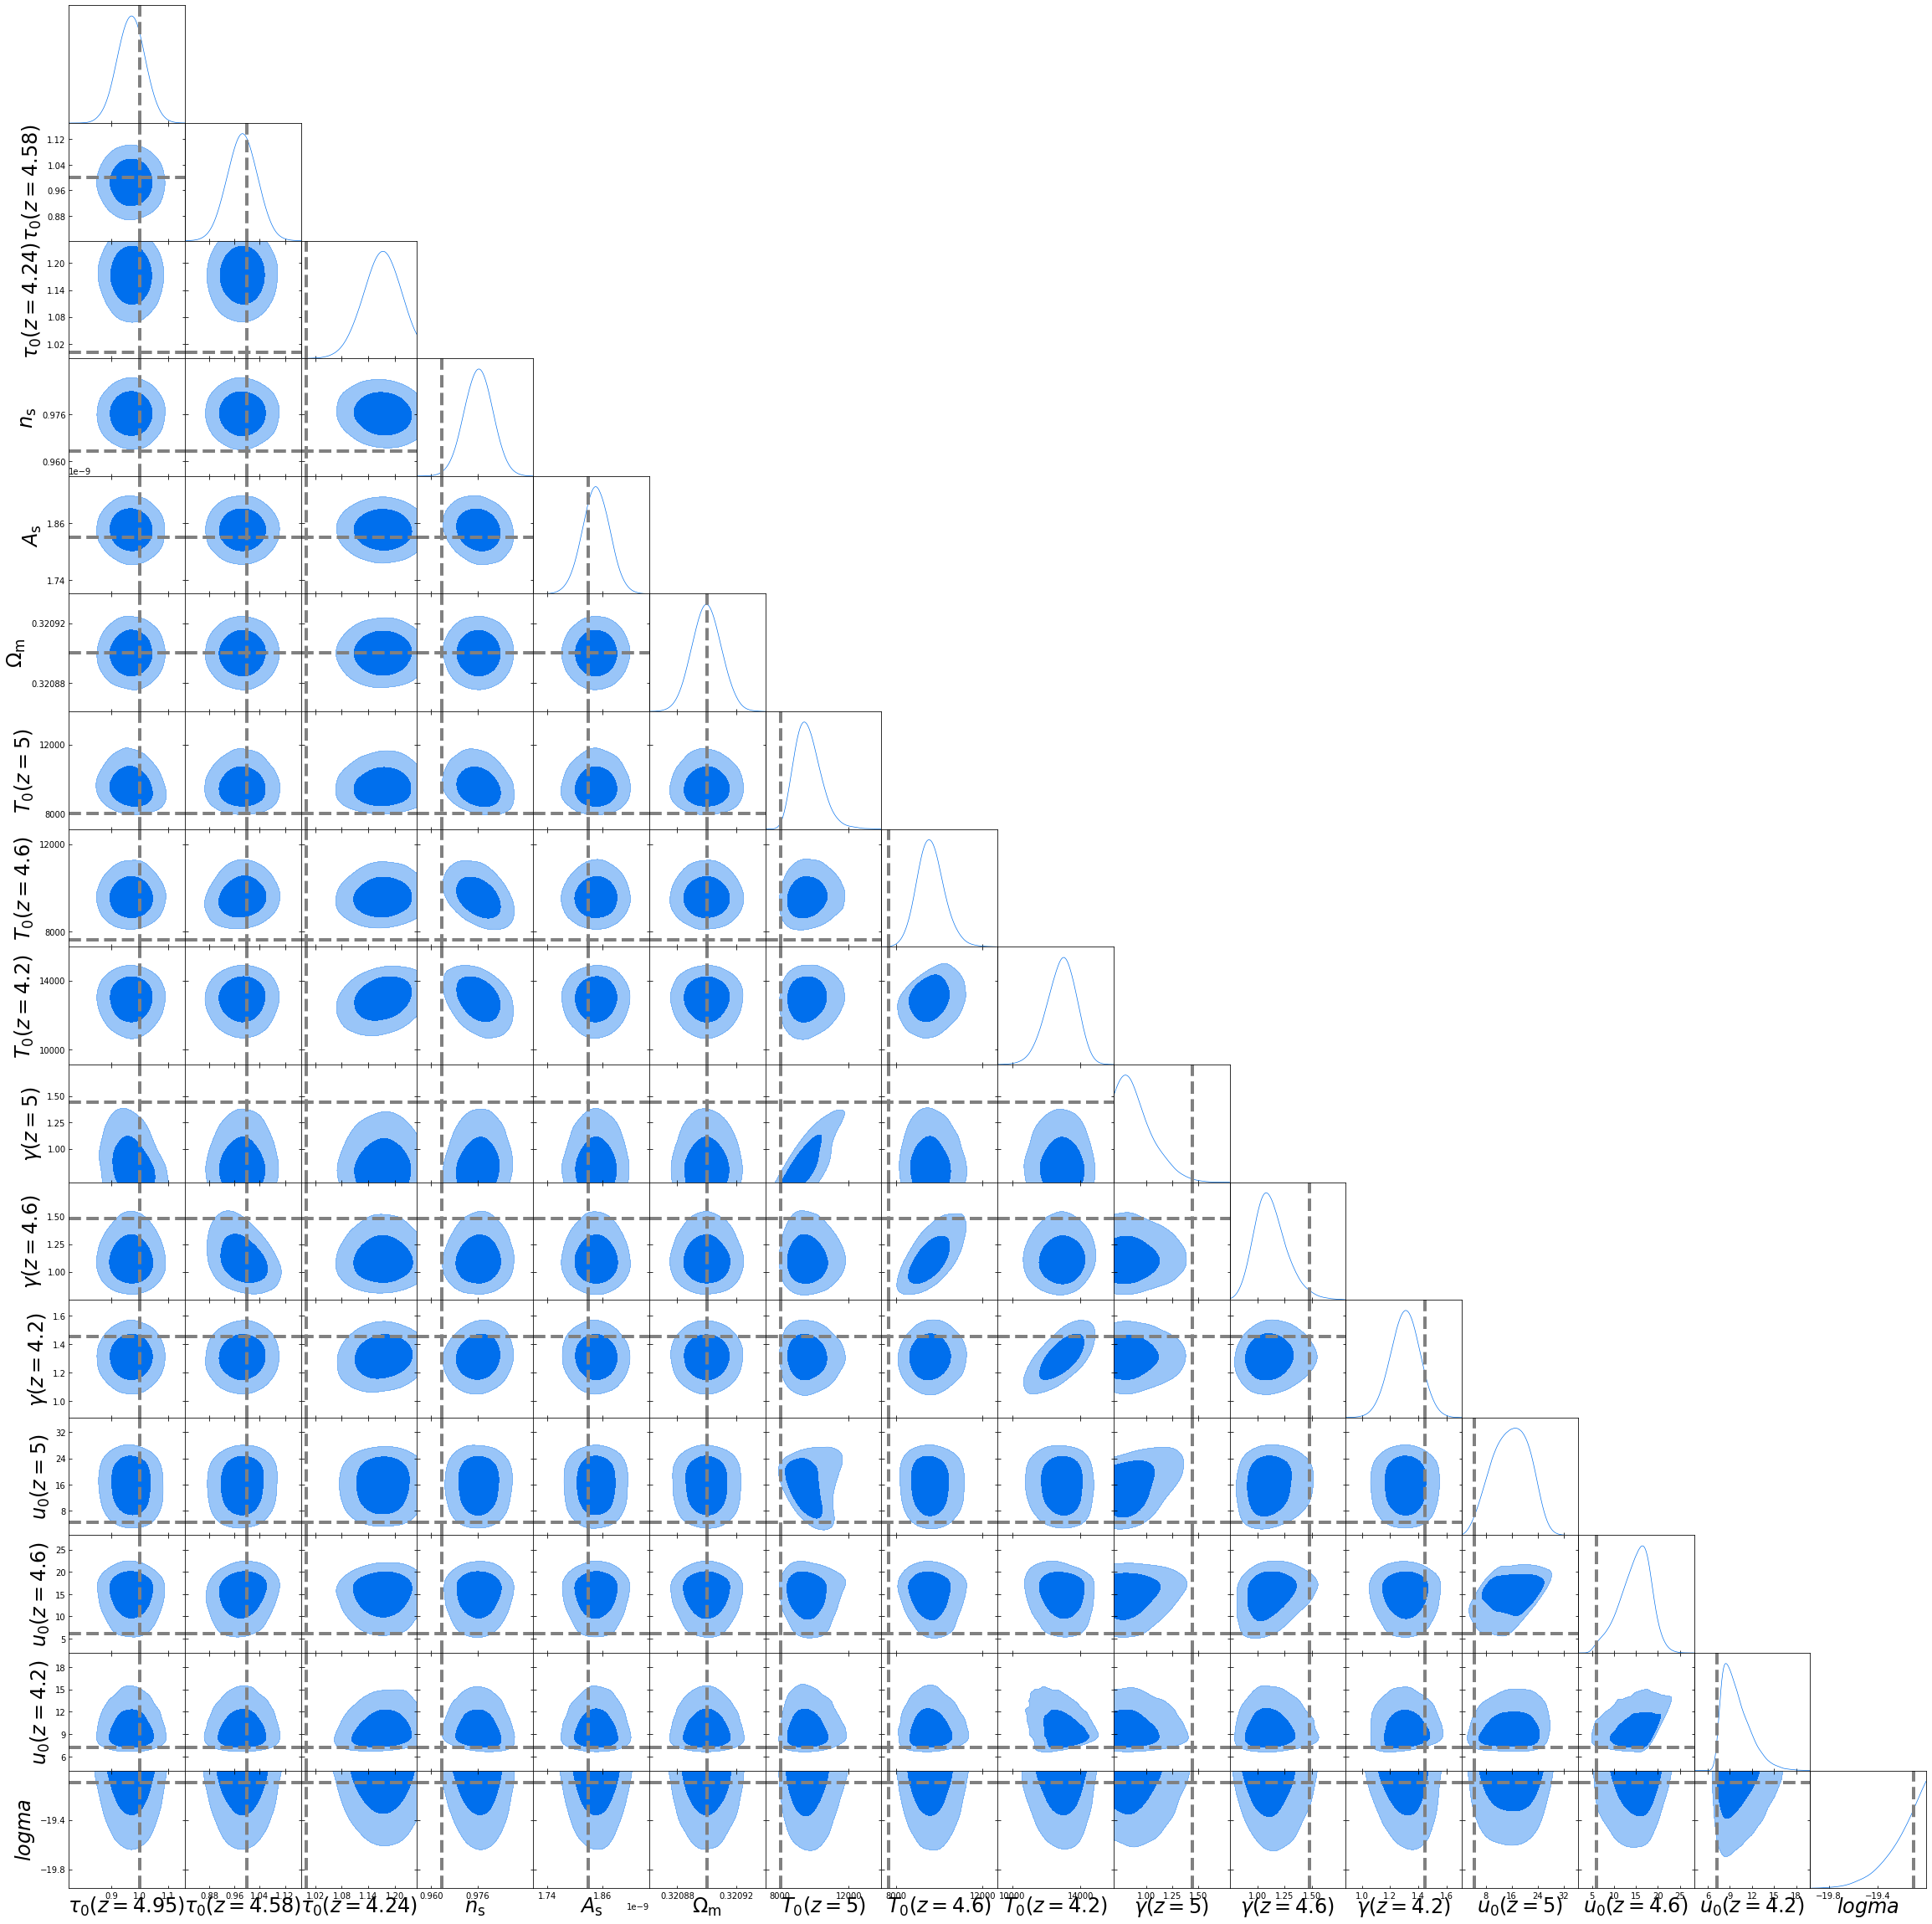

In [12]:
chainfile_root = '/home/keir/Plots/nCDM'
chainfile = 'chain_ns0.964As1.83e-09heat_slope0heat_amp1omega_m0.321alpha0beta1gamma-1z_rei8T_rei2e+04_1_emu50_data_TDR_u0_30000_ULA_fit_convex_hull_omega_m_fix_tau_Planck_T0_prior_no_jump_Tu0_new.txt'
chainfile = os.path.join(chainfile_root, chainfile)

subplot_instance, posterior_MCsamples = make_plot(chainfile, None, true_parameter_values=test_params_mf,
          pnames=likelihood_instance.likelihood_parameter_names[:, 1],
          ranges=likelihood_instance.param_limits) #subplot_instance, 


In [10]:
subplot_instance = posterior_MCsamples


In [ ]:
posterior_MCsamples


In [ ]:
posterior_MCsamples.confidence(3, 1. - 0.025) - posterior_MCsamples.confidence(3, 0.025)


In [103]:
#Get 1D marginalised posterior 2-sigma widths
two_sigma_widths = np.zeros(test_params_mf.shape[0])

for i in range(test_params_mf.shape[0]):
    if i < test_params_mf.shape[0] - 1:
        two_sigma_widths[i] = posterior_MCsamples.confidence(i, 1. - 0.16) - posterior_MCsamples.confidence(i, 0.16)
    else:
        two_sigma_widths[i] = posterior_MCsamples.confidence(i, 0., upper=True)
        two_sigma_widths[i] -= posterior_MCsamples.confidence(i, 0.32, upper=False)
    print(i, two_sigma_widths[i])


0 0.09710788494372469
1 0.09601256625223986
2 0.08359155213836567
3 0.009784443694335399
4 5.857283066871982e-11
5 2.0005337264983325e-05
6 1531.2042378043989
7 1239.470692904155
8 1729.6778869300197
9 0.3338027152547748
10 0.29317137149978145
11 0.20747774296947674
12 11.979440221129911
13 7.073610717604051
14 3.7336014276410996
15 0.2345353356576183


In [28]:
#BO-2
'''Maximum of acquisition function =      fun: 466.33557233140635
     jac: array([   835.13521076,   1378.2292001 ,     74.22009389,  -1044.33941601,
          617.11024273, -30423.03629286,  -1509.47687985,  -1065.44485448,
         -505.37934158,    446.88711114,    615.14414824,     68.26524555,
           47.24848282,    103.52549111,   -176.32960976,    504.28153031])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 44
     nit: 3
  status: 2
 success: True
       x: array([0.49881831, 0.49746923, 0.49975384, 0.67043992, 0.48394349,
       0.8693801 , 0.46032991, 0.44578074, 0.40862626, 0.6783833 ,
       0.68887429, 0.67756742, 0.10901014, 0.1219898 , 0.17474122,
       0.96546435])
[ 9.99409157e-01  9.98734614e-01  9.99876922e-01  9.63691792e-01
  1.82912654e-09  3.20856607e-01  8.07690260e+03  7.69627939e+03
  8.69196272e+03  1.43934456e+00  1.47890392e+00  1.44994347e+00
  4.57812753e+00  6.08494821e+00  7.25450102e+00 -1.91036069e+01]
Starting params = [ 1.0000e+00  1.0000e+00  1.0000e+00  9.6350e-01  1.8296e-09  3.2090e-01
  8.0220e+03  7.6510e+03  8.6730e+03  1.4400e+00  1.4800e+00  1.4500e+00
  4.5600e+00  6.1100e+00  7.2400e+00 -1.9100e+01]'''

acquire_max_params = np.array([9.99409157e-01,  9.98734614e-01,  9.99876922e-01,  9.63691792e-01,
  1.82912654e-09,  3.20856607e-01,  8.07690260e+03,  7.69627939e+03,
  8.69196272e+03,  1.43934456e+00,  1.47890392e+00,  1.44994347e+00,
  4.57812753e+00,  6.08494821e+00,  7.25450102e+00, -1.91036069e+01])


In [44]:
#BO-3
'''Maximum of acquisition function =      fun: 553.858517550698
     jac: array([   630.78268795,   1457.30476788,    134.79570953,   -494.66806331,
          768.61398384, -24200.39953677,  -1180.70286135,   -839.26307752,
         -471.83947345,    340.22875752,   -106.66661865,     87.13019497,
         -434.07424073,   -342.5328714 ,   -136.77173456,     27.5519028 ])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 37
     nit: 4
  status: 2
 success: True
       x: array([0.49875867, 0.49779218, 0.49969408, 0.66909322, 0.48380282,
       0.86950101, 0.45886623, 0.44487084, 0.40864958, 0.67830044,
       0.68889457, 0.67750003, 0.10922933, 0.12277553, 0.17474861,
       0.96510841])
[ 9.99379333e-01  9.98896089e-01  9.99847042e-01  9.63563856e-01
  1.82894366e-09  3.20865071e-01  8.05537576e+03  7.68315282e+03
  8.69238257e+03  1.43925228e+00  1.47892548e+00  1.44987401e+00
  4.58614273e+00  6.11621954e+00  7.25474638e+00 -1.91046748e+01]
Starting params = [ 1.0000e+00  1.0000e+00  1.0000e+00  9.6350e-01  1.8296e-09  3.2090e-01
  8.0220e+03  7.6510e+03  8.6730e+03  1.4400e+00  1.4800e+00  1.4500e+00
  4.5600e+00  6.1100e+00  7.2400e+00 -1.9100e+01]'''

'''Displaced optimisation parameters = [ 9.59389608e-01  9.88203136e-01  9.74316390e-01  9.59446665e-01
  1.85124857e-09  3.20871525e-01  9.86853588e+03  8.29949490e+03
  7.90645953e+03  1.24767917e+00  1.65222461e+00  1.49870853e+00
  1.11716194e+01  1.32436747e+01  8.93386324e+00 -1.94225812e+01]
0 0.9593896075706287 [0.75 1.25]
1 0.9882031363192021 [0.75 1.25]
2 0.9743163901436696 [0.75 1.25]
3 0.95944666499343 [0.9   0.995]
4 1.8512485666458976e-09 [1.2e-09 2.5e-09]
5 0.3208715246119656 [0.26 0.33]
6 9868.53588210762 [ 1306.64901767 16014.04365088]
7 8299.49490454025 [ 1265.31807371 15691.6058616 ]
8 7906.459533678113 [ 1336.50934672 19336.95173901]
9 1.247679171075966 [0.6839111  1.79749019]
10 1.6522246078280087 [0.74675074 1.80957627]
11 1.498708528239474 [0.75153156 1.78229528]
12 11.171619366799703 [ 0.59192435 37.15919428]
13 13.243674653419806 [ 1.22989057 41.02877384]
14 8.9338632394292 [ 1.4517912  34.65923769]
15 -19.422581168833826 [-22. -19.]'''

acquire_max_params = np.array([9.59389608e-01,  9.88203136e-01, 9.74316390e-01,  9.59446665e-01,
  1.85124857e-09,  3.20871525e-01,  9.86853588e+03,  8.29949490e+03,
  7.90645953e+03,  1.24767917e+00,  1.65222461e+00,  1.49870853e+00,
  1.11716194e+01,  1.32436747e+01,  8.93386324e+00, -1.94225812e+01])


In [ ]:
#BO-4
'''Maximum of acquisition function =      fun: -272.4418152251446
     jac: array([-3.48887625e+001, -1.67137199e+002, -5.87289378e+001,
       -1.39209114e+003, -1.53483273e+002,  5.07870416e+004,
       -1.00842918e+003,  1.00000000e+107, -1.78378514e+001,
       -8.46358887e+001, -4.85464915e+002,  1.62874358e+001,
        2.80938826e+002,  7.54869865e+002,  1.98983741e+001,
       -1.43543099e+002])
 message: 'Linear search failed'
    nfev: 155
     nit: 13
  status: 4
 success: False
       x: array([0.32556211, 0.26167202, 0.43656616, 0.87920338, 0.46155888,
       0.87104606, 0.81465975, 0.86041566, 0.58323003, 0.58258102,
       0.58776091, 0.63988864, 0.15983808, 0.13734295, 0.24069258,
       0.7734021 ])
[ 9.12781054e-01  8.80836009e-01  9.68283079e-01  9.83524321e-01
  1.80002654e-09  3.20973224e-01  1.32881714e+04  1.36779220e+04
  1.18349079e+04  1.33266114e+00  1.37143805e+00  1.41110556e+00
  6.43676659e+00  6.69598649e+00  9.44457704e+00 -1.96797937e+01]
Starting params = [ 1.0000e+00  1.0000e+00  1.0000e+00  9.6350e-01  1.8296e-09  3.2090e-01
  8.0220e+03  7.6510e+03  8.6730e+03  1.4400e+00  1.4800e+00  1.4500e+00
  4.5600e+00  6.1100e+00  7.2400e+00 -1.9100e+01]'''

acquire_max_params = np.array([9.12781054e-01,  8.80836009e-01  9.68283079e-01,  9.83524321e-01,
  1.80002654e-09,  3.20973224e-01,  1.32881714e+04,  1.36779220e+04,
  1.18349079e+04,  1.33266114e+00,  1.37143805e+00,  1.41110556e+00,
  6.43676659e+00,  6.69598649e+00,  9.44457704e+00, -1.96797937e+01])


In [104]:
#Add random displacement
displacement = npr.normal(scale=two_sigma_widths)

#displacement[-1] = -1. * np.absolute(displacement[-1])

print('Displacement vector =', displacement)


Displacement vector = [-1.04841589e-01  1.27323211e-02 -1.08054766e-01 -1.42261905e-03
 -1.52651101e-10  5.22239281e-06 -6.72751924e+02 -1.95760610e+03
 -1.29449845e+03  1.30035652e-01 -4.79661659e-01  2.63197907e-01
 -6.09067335e-01  8.26991985e+00  2.42556753e+00  3.03437982e-01]


In [105]:
acquire_max_params += displacement

if acquire_max_params[-1] > likelihood_instance.param_limits[-1, 1]:
    acquire_max_params[-1] = likelihood_instance.param_limits[-1, 1]

print('Displaced optimisation parameters =', acquire_max_params)

for i, param in enumerate(acquire_max_params):
    print(i, param, likelihood_instance.param_limits[i])
    assert param >= likelihood_instance.param_limits[i, 0]
    assert param <= likelihood_instance.param_limits[i, 1]


Displaced optimisation parameters = [ 8.94952819e-01  1.01235387e+00  8.91905107e-01  9.62107388e-01
  1.67684393e-09  3.20884381e-01  7.36115869e+03  5.70589652e+03
  7.38447355e+03  1.56982063e+00  9.99955882e-01  1.71317010e+00
  3.95935413e+00  1.43718233e+01  9.66991679e+00 -1.90000000e+01]
0 0.8949528194687116 [0.75 1.25]
1 1.0123538739680475 [0.75 1.25]
2 0.8919051068731405 [0.75 1.25]
3 0.9621073882943276 [0.9   0.995]
4 1.6768439330345296e-09 [1.2e-09 2.5e-09]
5 0.32088438125000607 [0.26 0.33]
6 7361.158686946542 [ 1306.64901767 16014.04365088]
7 5705.896524851392 [ 1265.31807371 15691.6058616 ]
8 7384.473548064406 [ 1336.50934672 19336.95173901]
9 1.5698206339868257 [0.6839111  1.79749019]
10 0.999955882286928 [0.74675074 1.80957627]
11 1.7131701037707234 [0.75153156 1.78229528]
12 3.9593541294778793 [ 0.59192435 37.15919428]
13 14.371823290644612 [ 1.22989057 41.02877384]
14 9.669916788918767 [ 1.4517912  34.65923769]
15 -19.0 [-22. -19.]


In [106]:
#Plot test points
for a in range(0, test_params_mf.shape[0]):
    for b in range(a + 1):
        ax = subplot_instance.subplots[a, b]
        if b < a:
            ax.scatter(acquire_max_params[b - 0], acquire_max_params[a - 0], s=1000, color='cyan', marker='+')


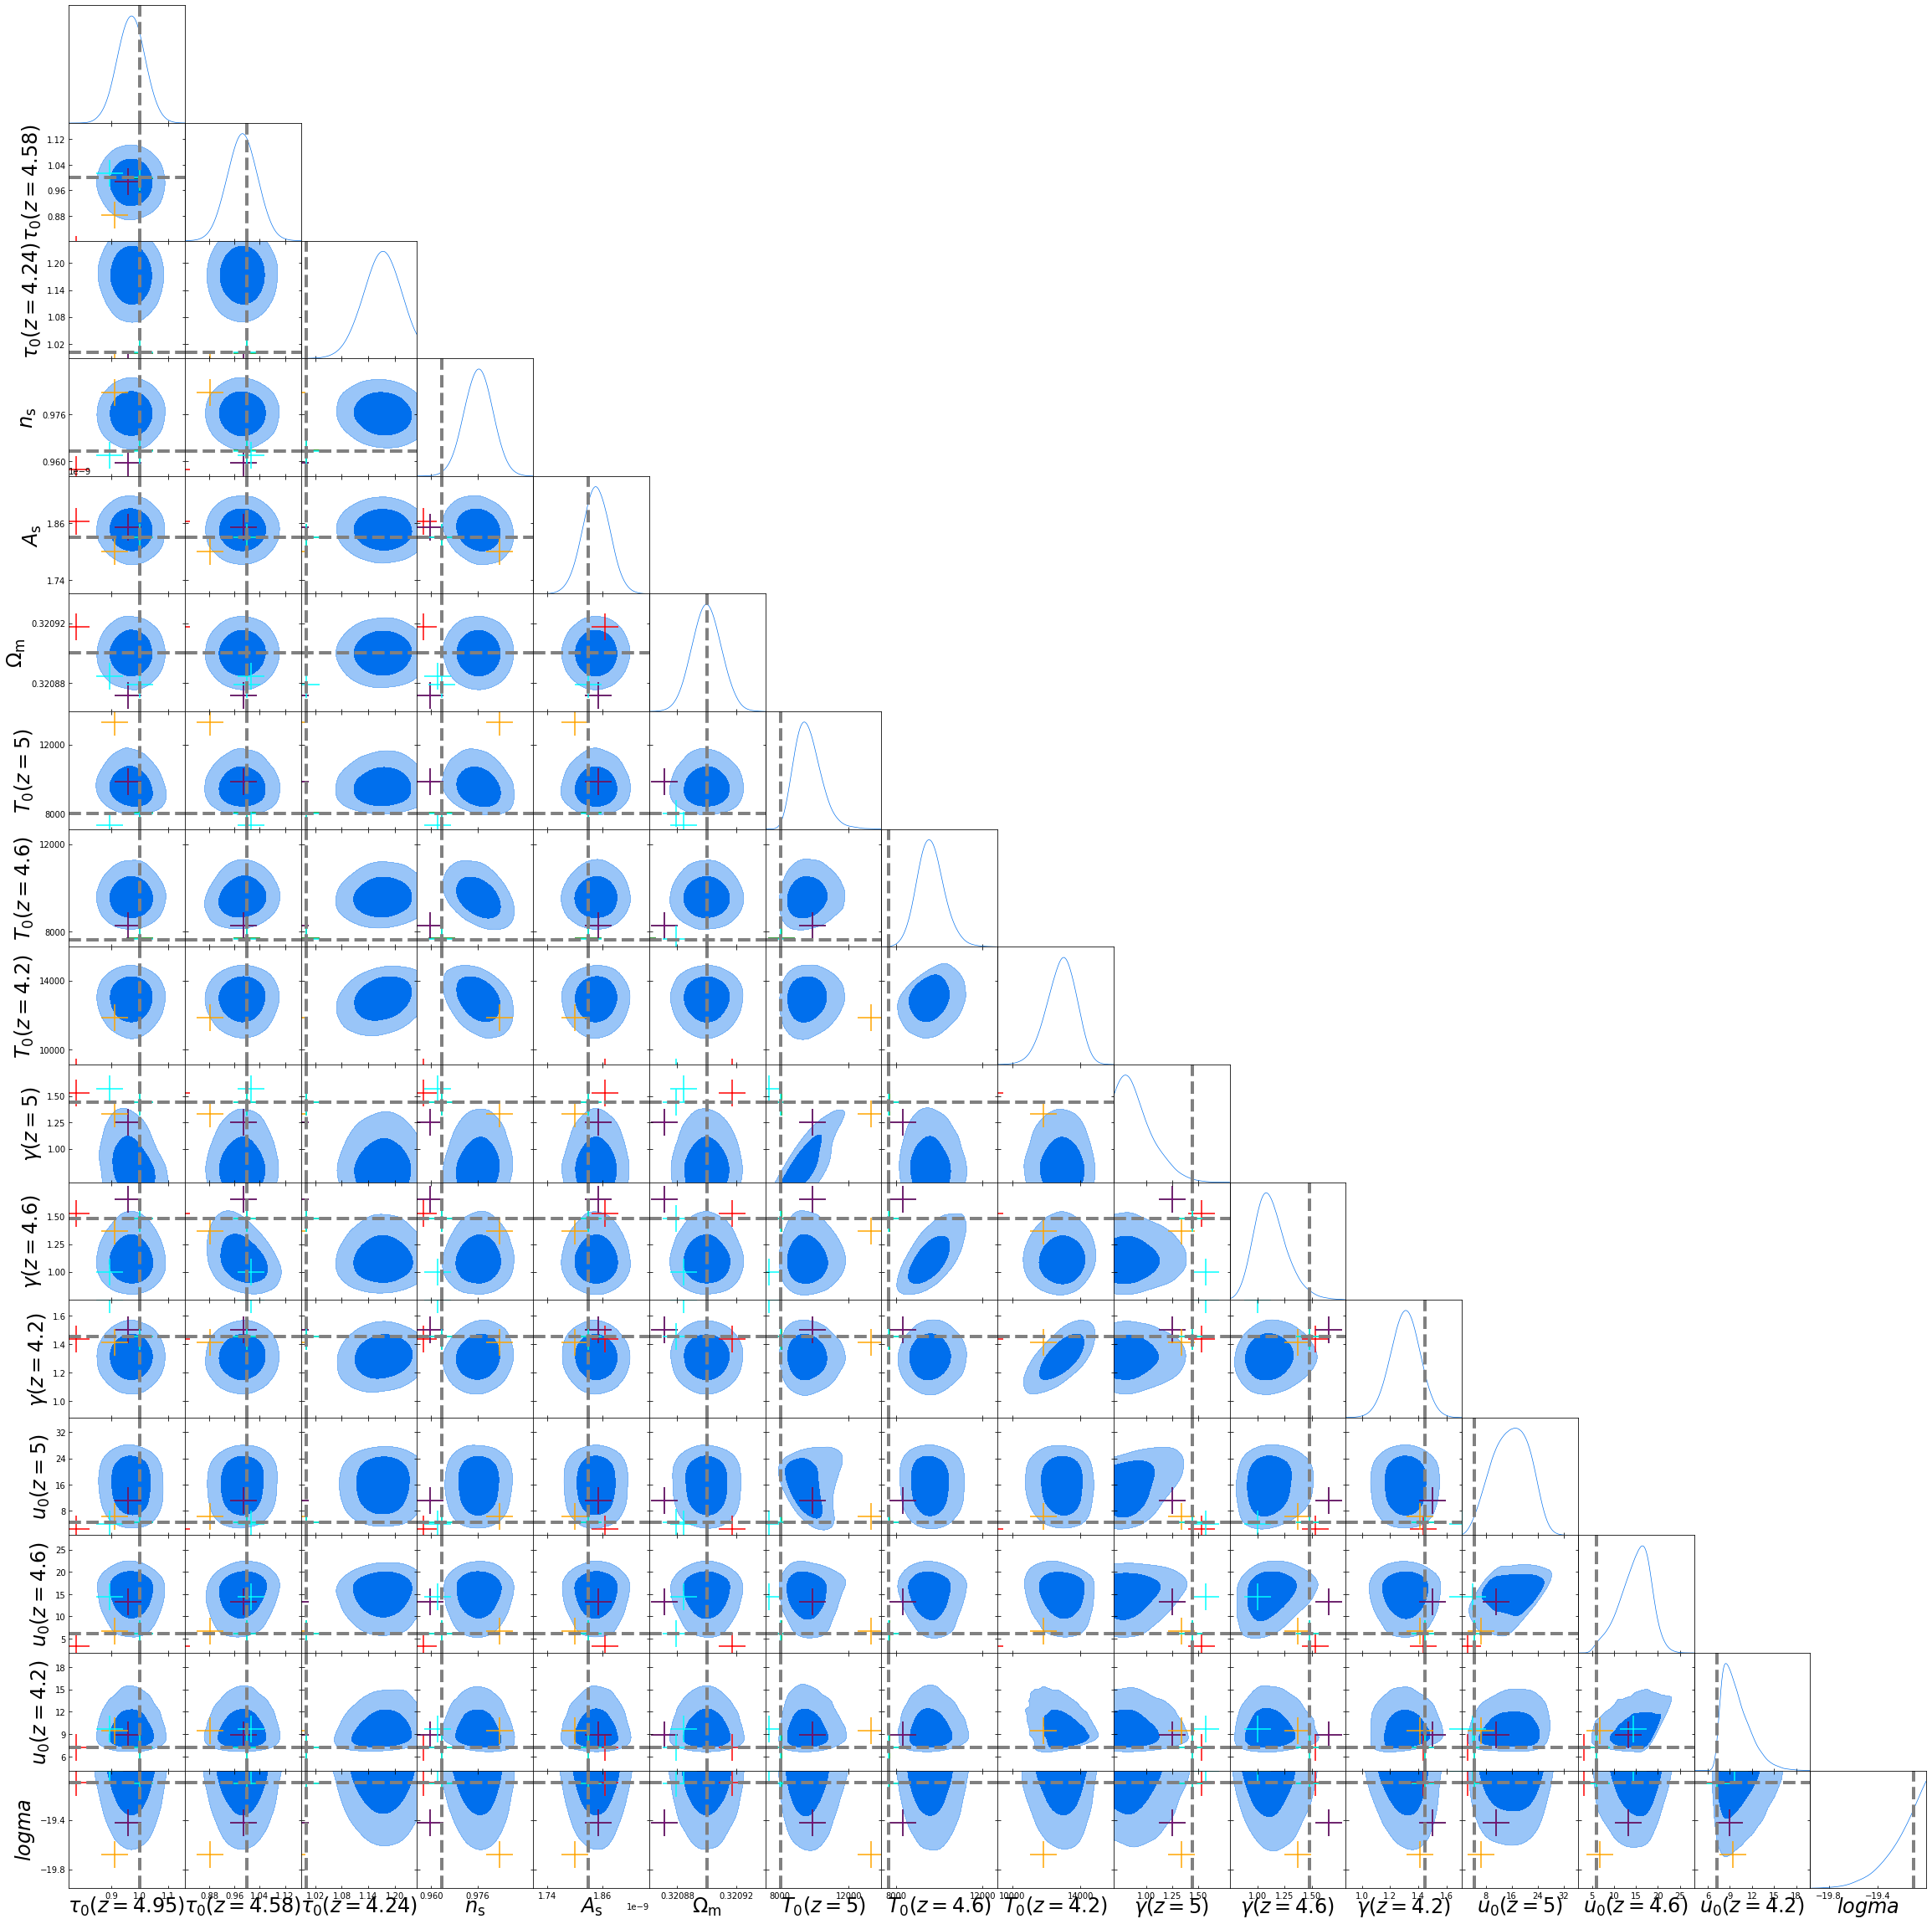

In [107]:
subplot_instance.fig


In [5]:
#BO-1
'''Maximum of acquisition function =      fun: -353.914275727603
     jac: array([ 4.55890307e+02,  4.89668190e+02,  2.95751647e+01,  4.49569450e+02,
       -3.77147819e+02,  1.14626398e+04,  1.19608262e+02,  1.13920612e+02,
       -9.70749170e-01, -7.27263853e+01, -7.31309228e+01,  3.79277651e+01,
        2.01726948e+02,  2.63873142e+02,  5.39544658e+00, -3.13192612e+02])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 58
     nit: 8
  status: 2
 success: True
       x: array([0.05      , 0.05      , 0.35450285, 0.60230512, 0.51105329,
       0.87024889, 0.30105636, 0.34192525, 0.40767761, 0.75969048,
       0.73606158, 0.66219663, 0.05      , 0.05      , 0.17386334,
       0.96686619])
[ 7.75000000e-01  7.75000000e-01  9.27251427e-01  9.57218987e-01
  1.86436927e-09  3.20917423e-01  5.73440366e+03  6.19803012e+03
  8.67488662e+03  1.52988653e+00  1.52905577e+00  1.43409983e+00
  2.42028785e+00  3.21983473e+00  7.22534864e+00 -1.90994014e+01]
Starting params = [ 7.7000e-01  7.8000e-01  9.3000e-01  9.6350e-01  1.8296e-09  3.2090e-01
  8.0220e+03  7.6510e+03  8.6730e+03  1.4400e+00  1.4800e+00  1.4500e+00
  4.5600e+00  6.1100e+00  7.2400e+00 -1.9100e+01]'''

acquire_max_params = np.array([ 7.75000000e-01,  7.75000000e-01,  9.27251427e-01,  9.57218987e-01,
  1.86436927e-09,  3.20917423e-01,  5.73440366e+03,  6.19803012e+03,
  8.67488662e+03,  1.52988653e+00,  1.52905577e+00,  1.43409983e+00,
  2.42028785e+00,  3.21983473e+00,  7.22534864e+00, -1.90994014e+01])


In [108]:
#nCDM conversion
nCDM_parameters = likelihood_instance.dark_matter_model(np.array([acquire_max_params[-1],]),
                                                       likelihood_instance.param_limits_nCDM)
print('nCDM parameters =', nCDM_parameters)


nCDM parameters = [ 5.20867204e-03  5.85795116e+00 -1.29628235e+00]


In [115]:
training_parameter_names = np.concatenate((np.array(['ns', 'As', 'omega_m']),
        np.array([key for key in likelihood_instance.emulator.measured_param_names.keys()]),
        np.array(['alpha', 'beta', 'gamma'])))
print(training_parameter_names)


['ns' 'As' 'omega_m' 'T_0_z_5.0' 'T_0_z_4.6' 'T_0_z_4.2' 'gamma_z_5.0'
 'gamma_z_4.6' 'gamma_z_4.2' 'u_0_z_5.0' 'u_0_z_4.6' 'u_0_z_4.2' 'alpha'
 'beta' 'gamma']


In [110]:
#heat_amp
measured_parameters = acquire_max_params[3: -1] #np.array([3, 4, -9, -6, -3])]
measured_parameters = np.concatenate((measured_parameters, nCDM_parameters))

training_parameter_names = np.concatenate((training_parameter_names, np.array(['heat_amp',])))

heat_amp = likelihood_instance.emulator.predict_parameters(measured_parameters,
                                                           training_parameter_names)
#np.array(['ns', 'As', 'T_0_z_4.6', 'gamma_z_4.6',
#            'u_0_z_4.6', 'alpha', 'beta', 'gamma', 'heat_amp']))
print('heat_amp =', heat_amp)


heat_amp = 0.7800597178728893


In [112]:
#heat_slope
#measured_parameters = acquire_max_params[np.array([-6])] #, -3])]
training_parameter_names = np.concatenate((training_parameter_names,
                                           np.array(['heat_slope',])))

heat_slope = likelihood_instance.emulator.predict_parameters(measured_parameters,
                                                             training_parameter_names)
#np.array(['ns', 'As', 'T_0_z_4.6', 'gamma_z_4.6',
#                'u_0_z_4.6', 'alpha', 'beta', 'gamma', 'heat_slope']))
print('heat_slope =', heat_slope)


heat_slope = -0.0234909785220061


In [114]:
#z_rei
#measured_parameters = acquire_max_params[np.array([-9, -6, -3])]
training_parameter_names = np.concatenate((training_parameter_names, np.array(['z_rei',])))

z_rei= likelihood_instance.emulator.predict_parameters(measured_parameters,
                                                       training_parameter_names)
#np.array(['ns', 'As', 'T_0_z_4.6', 'gamma_z_4.6',
#                'u_0_z_4.6', 'alpha', 'beta', 'gamma', 'heat_slope']))
print('z_rei =', z_rei)


z_rei = 11.88495172357593


In [116]:
#T_rei
#measured_parameters = acquire_max_params[np.array([-9, -6, -3])]
training_parameter_names = np.concatenate((training_parameter_names, np.array(['T_rei',])))

T_rei= likelihood_instance.emulator.predict_parameters(measured_parameters,
                                                       training_parameter_names)
#np.array(['ns', 'As', 'T_0_z_4.6', 'gamma_z_4.6',
#                'u_0_z_4.6', 'alpha', 'beta', 'gamma', 'heat_slope']))
print('T_rei =', T_rei)


T_rei = 33578.31603031387


Text(0,0.5,'heat_amp')

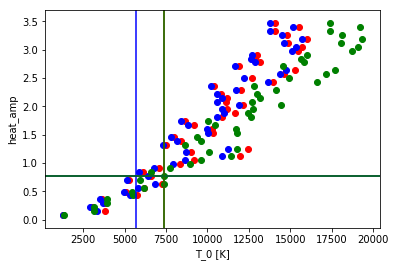

In [117]:
#Test parameter predictor
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(likelihood_instance.emulator.measured_sample_params[:, i],
                likelihood_instance.emulator.sample_params[:, 3], color=colors[i])
    plt.axvline(x=measured_parameters[i+3], color=colors[i])
    plt.axhline(y=heat_amp, color=colors[i])
plt.xlabel(r'T_0 [K]')
plt.ylabel(r'heat_amp')


Text(0,0.5,'heat_amp')

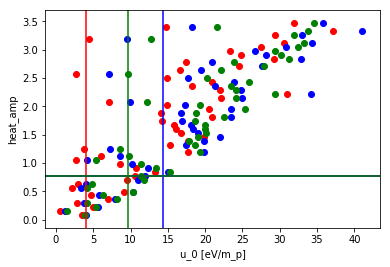

In [118]:
#Test heat_amp - u_0
for i in range(3):
    plt.scatter(likelihood_instance.emulator.measured_sample_params[:, i+6],
                likelihood_instance.emulator.sample_params[:, 3], color=colors[i])
    plt.axvline(x=measured_parameters[i+9], color=colors[i])
    plt.axhline(y=heat_amp, color=colors[i])
plt.xlabel(r'u_0 [eV/m_p]')
plt.ylabel(r'heat_amp')


Text(0,0.5,'heat_slope')

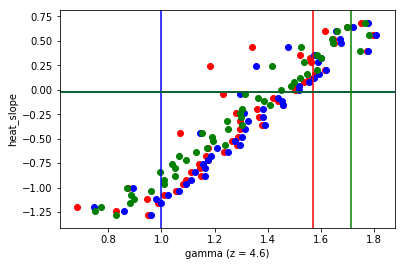

In [119]:
#Test heat_slope
for i in range(3):
    plt.scatter(likelihood_instance.emulator.measured_sample_params[:, i+3],
                likelihood_instance.emulator.sample_params[:, 2], color=colors[i])
    plt.axvline(x=measured_parameters[i+6], color=colors[i])
    plt.axhline(y=heat_slope, color=colors[i])
plt.xlabel(r'gamma (z = 4.6)')
plt.ylabel(r'heat_slope')


Text(0,0.5,'z_rei')

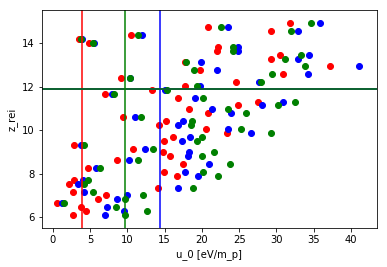

In [120]:
#Test z_rei
for i in range(3):
    plt.scatter(likelihood_instance.emulator.measured_sample_params[:, i+6],
                likelihood_instance.emulator.sample_params[:, 8], color=colors[i])
    plt.axvline(x=measured_parameters[i+9], color=colors[i])
    plt.axhline(y=z_rei, color=colors[i])
plt.xlabel(r'u_0 [eV/m_p]')
plt.ylabel(r'z_rei')


Text(0,0.5,'T_rei [K]')

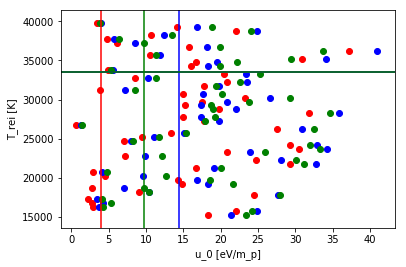

In [121]:
#Test T_rei
for i in range(3):
    plt.scatter(likelihood_instance.emulator.measured_sample_params[:, i+6],
                likelihood_instance.emulator.sample_params[:, 9], color=colors[i])
    plt.axvline(x=measured_parameters[i+9], color=colors[i])
    plt.axhline(y=T_rei, color=colors[i])
plt.xlabel(r'u_0 [eV/m_p]')
plt.ylabel(r'T_rei [K]')


In [122]:
#Add optimisation simulation
optimise_params = np.concatenate((acquire_max_params[np.array([3, 4])],
                                  np.array([heat_slope, heat_amp]),
                                  np.array([0.3209,]), nCDM_parameters,
                                  np.array([z_rei, T_rei]))).reshape(1, -1)
print('Parameters for optimisation simulation =', optimise_params)


Parameters for optimisation simulation = [[ 9.62107388e-01  1.67684393e-09 -2.34909785e-02  7.80059718e-01
   3.20900000e-01  5.20867204e-03  5.85795116e+00 -1.29628235e+00
   1.18849517e+01  3.35783160e+04]]


In [ ]:
optimise_params.shape


In [ ]:
likelihood_instance.gpemu.gps[2].param_limits


In [87]:
#Fix omega_m for batch optimisation
acquire_max_params[5] = 0.3209


In [88]:
#Parameters for batch optimisation
new_batch_params = np.insert(acquire_max_params[3:-1], 3, nCDM_parameters).reshape(1, -1)
print('new batch params =', new_batch_params)


new batch params = [[ 9.83524321e-01  1.80002654e-09  3.20900000e-01  1.04295223e-02
   5.73901850e+00 -1.44908897e+00  1.32881714e+04  1.36779220e+04
   1.18349079e+04  1.33266114e+00  1.37143805e+00  1.41110556e+00
   6.43676659e+00  6.69598649e+00  9.44457704e+00]]


In [ ]:
likelihood_instance.gpemu.redshift_sensitivity


In [89]:
#Batch optimisation
likelihood_instance.gpemu.add_to_training_set(new_batch_params)


In [90]:
likelihood_instance.gpemu.gps[0].gp_updated.X.shape


(540, 10)

In [123]:
likelihood_instance.emulator.gen_simulations(None, 512., 10., samples=optimise_params,
                                             add_optimisation=True, dumpfile='emulator_params_optimise_5.json',
                                             simulation_flags=np.array([55,]))
